In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [7]:
print(useducation_df)

                    PRIMARY_KEY                 STATE  YEAR  ENROLL  \
0                  1992_ALABAMA               ALABAMA  1992     NaN   
1                   1992_ALASKA                ALASKA  1992     NaN   
2                  1992_ARIZONA               ARIZONA  1992     NaN   
3                 1992_ARKANSAS              ARKANSAS  1992     NaN   
4               1992_CALIFORNIA            CALIFORNIA  1992     NaN   
5                 1992_COLORADO              COLORADO  1992     NaN   
6              1992_CONNECTICUT           CONNECTICUT  1992     NaN   
7                 1992_DELAWARE              DELAWARE  1992     NaN   
8     1992_DISTRICT_OF_COLUMBIA  DISTRICT_OF_COLUMBIA  1992     NaN   
9                  1992_FLORIDA               FLORIDA  1992     NaN   
10                 1992_GEORGIA               GEORGIA  1992     NaN   
11                  1992_HAWAII                HAWAII  1992     NaN   
12                   1992_IDAHO                 IDAHO  1992     NaN   
13    

In [8]:
useducation_df.info()
#education_df.isnull().sum()/education_df.isnull().count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

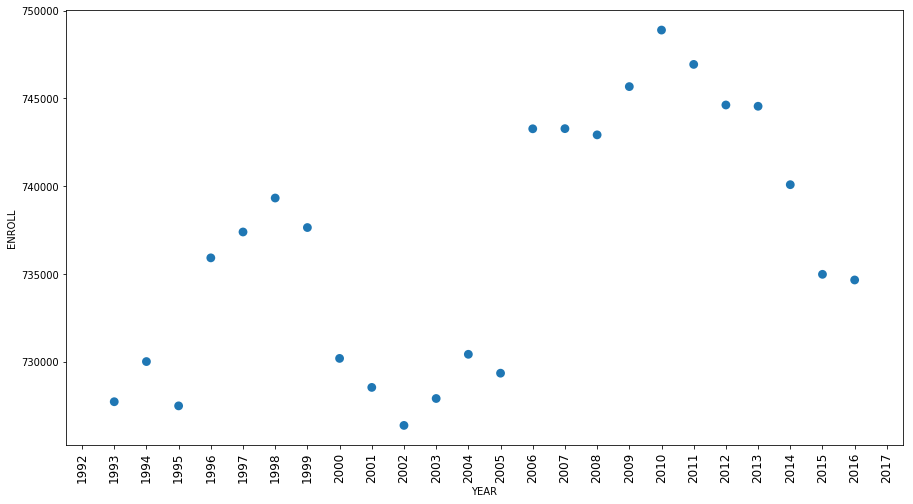

In [11]:
plt.figure(figsize=(15,8))
ax = sns.pointplot(x="YEAR", y="ENROLL", data=useducation_df[useducation_df.STATE=='ALABAMA'], join=False)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=12)

#### 1. Determine all the variable types and find the fraction of the missing values for each variable.

    - PRIMARY_KEY - categorical - 0 missing
    - STATE - categorical - 0% missing
    - YEAR - categorical - 0% missing
    - ENROLL - continuous - 17.6% missing

    - TOTAL_REVENUE - continuous - 14.2% missing
    - FEDERAL_REVENUE - continuous - 14.2% missing
    - STATE_REVENUE - continuous - 14.2% missing
    - LOCAL_REVENUE - continuous - 14.2% missing
    - TOTAL_EXPENDITURE - continuous - 14.2% missing
    - INSTRUCTION_EXPENDITURE - continuous - 14.2% missing
    - SUPPORT_SERVICES_EXPENDITURE - continuous - 14.2% missing
    - OTHER_EXPENDITURE - continuous - 17.6% missing
    - CAPITAL_OUTLAY_EXPENDITURE - continuous - 14.2% missing

    - GRADES_PK_G - continuous - 11.6% missing                     
    - GRADES_KG_G - continuous - 8.8% missing
    - GRADES_4_G - continuous - 8.7% missing 
    - GRADES_8_G - continuous - 8.7% missing                      
    - GRADES_12_G - continuous - 8.7% missing                     
    - GRADES_1_8_G - continuous - 8.7% missing                    
    - GRADES_9_12_G - continuous - 8.7% missing                   
    - GRADES_ALL_G - continuous - 11.6% missing

    - AVG_MATH_4_SCORE - continuous - 64% missing                
    - AVG_MATH_8_SCORE - continuous - 64.3% missing                
    - AVG_READING_4_SCORE - continuous - 64.2% missing             
    - AVG_READING_8_SCORE - continuous - 66.6% missing

#### 2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

Missing revenue/expenditure values can likely be filled in by calculating the relationships between each column. If all or more than half of the expenditure/revenue columns are null for a particular row, this row should probably just be dropped. We probably would not want to toss out any rows based on missing scores since scores only appear every other year and without the time dimension it would be diffucult to determine which data was left off on purpose and which data is just null. 

In [12]:
# Filling in NaNs with the mean in specific columns only

useducation2_df = useducation_df.copy()

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

for col in fill_list:
    useducation2_df.loc[:, col].fillna(useducation2_df.loc[:, col].mean(), inplace=True)
    
#print(useducation2_df)

#### 3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

Calculate missing data by averaging the previous and next year's data, or calculate based on a graphical pattern with each column plotted against the year. Revenue and expenditure can likely be caluculated from enrollment data and vice versa.

In [13]:
# Fill NaNs in columns in fill_list with the mean only from the corresponding year, not the mean of all years

useducation3_df = useducation_df.copy()

years = useducation3_df["YEAR"].unique()

for col in fill_list:
    for year in years:
        useducation3_df.loc[useducation3_df["YEAR"] == year, col].fillna(useducation3_df[useducation3_df["YEAR"] == year][col].mean(), inplace=True)

#### 4. This time, fill in the missing values using interpolation (extrapolation).

In [14]:
# Fill NaNs using pandas interpolation command

useducation4_df = useducation_df.copy()

for col in fill_list:
    useducation4_df.loc[:, col].interpolate(inplace=True)

#### 5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

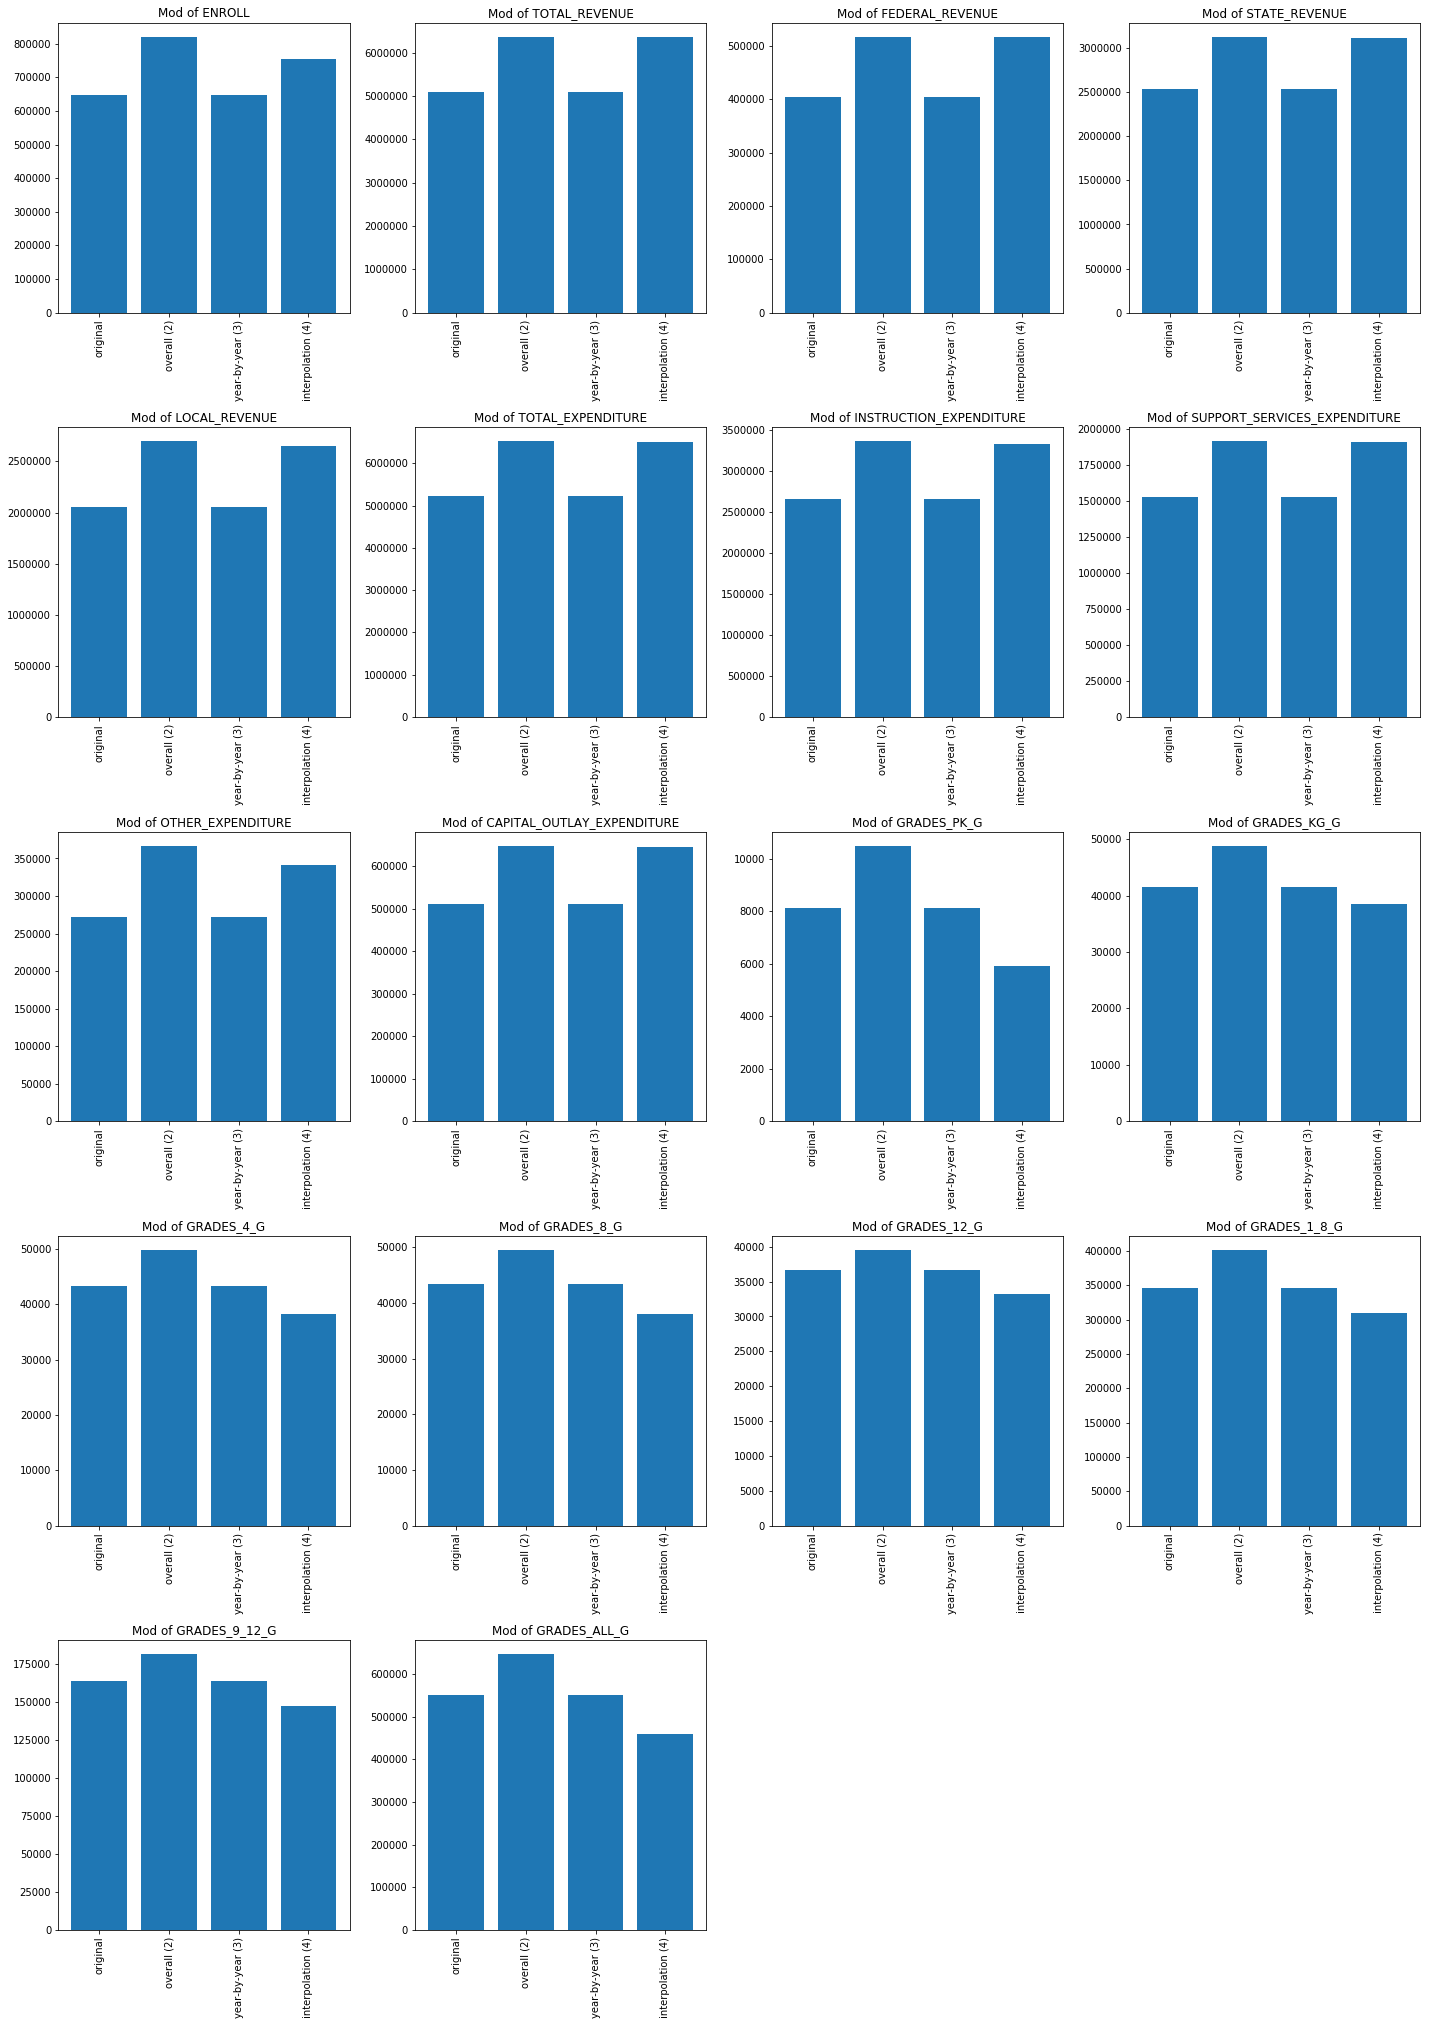

In [18]:
# Plotting the three questions, as well as the original values, for each variable chosen
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([useducation_df[col], useducation2_df[col],
                     useducation3_df[col], useducation4_df[col]], axis=1)
    
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["original", "overall (2)", "year-by-year (3)", "interpolation (4)"], df.median())
    plt.xticks(rotation="vertical")
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()

# In general these graphs show that there is not much difference between the three ways of filling in data.
# Filling NaNs year by year gives the most similar, if not the same, result to the original in every variable.
# Using the overall mean and interpolating give similar results for the revenue/expenditure variables, but the
# overall mean seems to be an overestimate (if we consider interpolation to be the most accurate) for all grades
# variables. In conclusion the overall mean gives the best results for some continuous variables, but not all.